In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
crimes = pd.read_excel('theft.xlsx')
traffic = pd.read_csv('chickens.csv')

In [3]:
crimes.columns

Index(['Region', 'Sub Region', 'Country', 'Count', 'Rate', 'Year'], dtype='object')

In [4]:
traffic.columns

Index(['Unnamed: 0', 'Domain Code', 'Domain', 'Area Code', 'Area',
       'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Flag Description', 'Value Extended'],
      dtype='object')

In [5]:
traffic.rename(columns={'Area':'Country'}, inplace=True)

In [6]:
traffic

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Value Extended
0,45,TA,Live animals,2,Afghanistan,5609,Import Quantity,1057,Chickens,2010,2010,1000 Head,3892.0,NaN,Official data,3892000.0
1,46,TA,Live animals,2,Afghanistan,5609,Import Quantity,1057,Chickens,2011,2011,1000 Head,4720.0,NaN,Official data,4720000.0
2,47,TA,Live animals,2,Afghanistan,5609,Import Quantity,1057,Chickens,2012,2012,1000 Head,1094.0,NaN,Official data,1094000.0
3,48,TA,Live animals,2,Afghanistan,5609,Import Quantity,1057,Chickens,2013,2013,1000 Head,2874.0,R,Estimated data using trading partners database,2874000.0
4,49,TA,Live animals,2,Afghanistan,5609,Import Quantity,1057,Chickens,2014,2014,1000 Head,10700.0,R,Estimated data using trading partners database,10700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,47615,TA,Live animals,181,Zimbabwe,5922,Export Value,1057,Chickens,2013,2013,1000 US$,2140.0,NaN,Official data,2140000.0
5148,47616,TA,Live animals,181,Zimbabwe,5922,Export Value,1057,Chickens,2014,2014,1000 US$,2904.0,NaN,Official data,2904000.0
5149,47617,TA,Live animals,181,Zimbabwe,5922,Export Value,1057,Chickens,2015,2015,1000 US$,3034.0,NaN,Official data,3034000.0
5150,47618,TA,Live animals,181,Zimbabwe,5922,Export Value,1057,Chickens,2016,2016,1000 US$,1924.0,NaN,Official data,1924000.0


In [7]:
criminal_traffic = traffic.merge(crimes, on=['Country', 'Year'])

In [9]:
criminal_traffic.head(3)

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Value Extended,Region,Sub Region,Count,Rate
0,184,TA,Live animals,3,Albania,5609,Import Quantity,1057,Chickens,2010,2010,1000 Head,7738.0,NaN,Official data,7738000.0,Europe,Southern Europe,3978,135.281965
1,192,TA,Live animals,3,Albania,5622,Import Value,1057,Chickens,2010,2010,1000 US$,5288.0,NaN,Official data,5288000.0,Europe,Southern Europe,3978,135.281965
2,200,TA,Live animals,3,Albania,5909,Export Quantity,1057,Chickens,2010,2010,1000 Head,0.0,F,FAO estimate,0.0,Europe,Southern Europe,3978,135.281965


In [13]:
criminal_traffic['CCM'] = criminal_traffic['Value Extended'] * criminal_traffic['Count'] / 1000000
criminal_traffic[ ['Country', 'Year', 'Value Extended', 'Count', 'CCM'] ]

,Country,Year,Value Extended,Count,CCM
0,Albania,2010,7738000.0,3978,30781.764
1,Albania,2010,5288000.0,3978,21035.664
2,Albania,2010,0.0,3978,0.000
3,Albania,2010,0.0,3978,0.000
4,Albania,2011,6901000.0,4621,31889.521
...,...,...,...,...,...
2203,Uruguay,2014,1976000.0,101683,200925.608
2204,Uruguay,2015,454000.0,104443,47417.122
2205,Uruguay,2015,2435000.0,104443,254318.705
2206,Uruguay,2016,414000.0,110401,45706.014


In [14]:
recent_filter = criminal_traffic['Year'] > 2013
export_filter = criminal_traffic['Element'] == 'Export Quantity'
recent_traffic = criminal_traffic[ recent_filter & export_filter ]
recent_traffic

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,...,Unit,Value,Flag,Flag Description,Value Extended,Region,Sub Region,Count,Rate,CCM
22,204,TA,Live animals,3,Albania,5909,Export Quantity,1057,Chickens,2016,...,1000 Head,115.0,NaN,Official data,115000.0,Europe,Southern Europe,5633,192.443703,6.477950e+02
46,1075,TA,Live animals,9,Argentina,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,196.0,NaN,Official data,196000.0,Americas,South America,287063,667.875481,5.626435e+04
50,1076,TA,Live animals,9,Argentina,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,181.0,NaN,Official data,181000.0,Americas,South America,271921,626.289723,4.921770e+04
54,1077,TA,Live animals,9,Argentina,5909,Export Quantity,1057,Chickens,2016,...,1000 Head,127.0,NaN,Official data,127000.0,Americas,South America,270125,616.213137,3.430588e+04
86,1775,TA,Live animals,10,Australia,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,106.0,NaN,Official data,106000.0,Oceania,Australia and New Zealand,535556,2281.420977,5.676894e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,45267,TA,Live animals,215,United Republic of Tanzania,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,5.0,NaN,Official data,5000.0,Africa,Eastern Africa,1043,1.996750,5.215000e+00
2156,45268,TA,Live animals,215,United Republic of Tanzania,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,19.0,NaN,Official data,19000.0,Africa,Eastern Africa,179,0.332220,3.401000e+00
2176,45608,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,90341.0,NaN,Official data,90341000.0,Americas,Northern America,5809100,1828.377919,5.247999e+08
2180,45609,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,61736.0,NaN,Official data,61736000.0,Americas,Northern America,5723500,1788.989776,3.533460e+08


In [16]:
recent_traffic['Element'].unique()

array(['Export Quantity'], dtype=object)

In [17]:
recent_traffic.sort_values(by='CCM', ascending=False)

,Unnamed: 0,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,...,Unit,Value,Flag,Flag Description,Value Extended,Region,Sub Region,Count,Rate,CCM
2176,45608,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,90341.0,NaN,Official data,90341000.0,Americas,Northern America,5809100,1828.377919,5.247999e+08
764,17052,TA,Live animals,79,Germany,5909,Export Quantity,1057,Chickens,2016,...,1000 Head,333700.0,NaN,Official data,333700000.0,Europe,Western Europe,1290481,1576.172925,4.306335e+08
760,17051,TA,Live animals,79,Germany,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,292094.0,NaN,Official data,292094000.0,Europe,Western Europe,1348955,1650.950315,3.940217e+08
2184,45610,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2016,...,1000 Head,68995.0,NaN,Official data,68995000.0,Americas,Northern America,5638500,1749.839046,3.890283e+08
2180,45609,TA,Live animals,231,United States of America,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,61736.0,NaN,Official data,61736000.0,Americas,Northern America,5723500,1788.989776,3.533460e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,21912,TA,Live animals,109,Jamaica,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,1.0,NaN,Official data,1000.0,Americas,Caribbean,447,15.617974,4.470000e-01
1406,29397,TA,Live animals,149,Nepal,5909,Export Quantity,1057,Chickens,2016,...,1000 Head,0.0,NaN,Official data,0.0,Asia,Southern Asia,1274,4.396578,0.000000e+00
1840,38322,TA,Live animals,200,Singapore,5909,Export Quantity,1057,Chickens,2014,...,1000 Head,0.0,F,FAO estimate,0.0,Asia,South-Eastern Asia,16182,297.007787,0.000000e+00
1844,38323,TA,Live animals,200,Singapore,5909,Export Quantity,1057,Chickens,2015,...,1000 Head,0.0,F,FAO estimate,0.0,Asia,South-Eastern Asia,15207,274.729543,0.000000e+00


In [18]:
pivot = recent_traffic.pivot_table(index=['Region', 'Country'], columns='Year', values='CCM')

In [20]:
pivot.to_excel('report_pollo_traffico_manigoldi.xlsx')

In [21]:
agents = recent_traffic.groupby('Region')
agents

Folder Africa already exists. Overwriting files


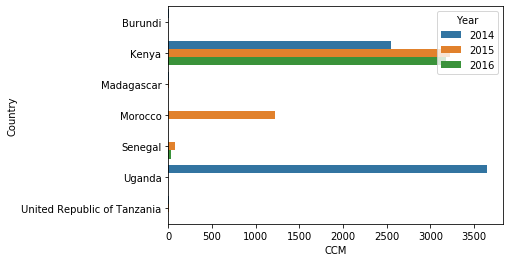

Folder Americas already exists. Overwriting files


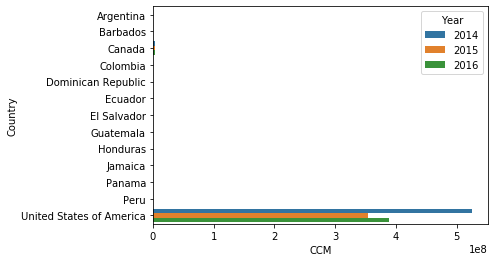

Folder Asia already exists. Overwriting files


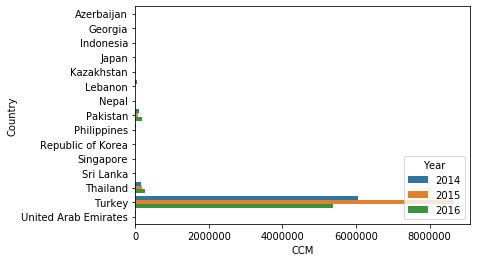

Folder Europe already exists. Overwriting files


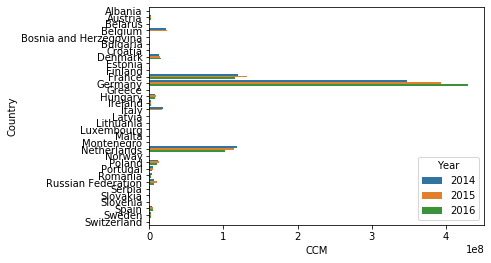

Folder Oceania already exists. Overwriting files


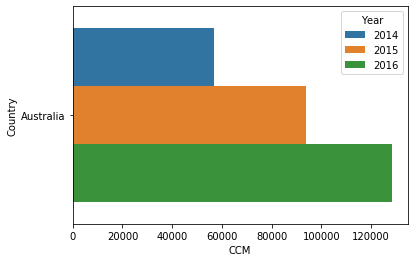

In [31]:
for name, group in agents:
    try:
        os.mkdir(name)
    except:
        print(f'Folder {name} already exists. Overwriting files')
    
    group.to_csv(name + '/raw.csv')
    g_pivot = group.pivot_table(index=['Sub Region', 'Country'], columns='Year', values=['CCM', 'Count', 'Value Extended'], margins=True)
    g_pivot.to_excel(name + '/pivot.xlsx')
    
    sns.barplot(data=group, y='Country', x='CCM', hue='Year')
    plt.savefig(name + '/plot.png')
    plt.show()